<h4>Where is my nltk package installed </h4>

In [1]:
import nltk
print(nltk.__file__)

/anaconda3/lib/python3.6/site-packages/nltk/__init__.py


<h4>Reading one of the corpora </h4>

In [2]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize , word_tokenize

sample = gutenberg.raw("bible-kjv.txt")
sentence = sent_tokenize(sample)

print(sentence[0])

[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called Genesis


1:1 In the beginning God created the heaven and the earth.


We can now tokenize each of the sentences

In [3]:
words = word_tokenize(sentence[0])
print(words[:])

['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', ':', 'Called', 'Genesis', '1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']


<h4>Files in a corpus</h4>

In [4]:
for f in nltk.corpus.gutenberg.fileids():
    print(f)

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


<h4>Average characters per word, words per sentence, sentence per file,...</h4>

In [5]:
from nltk.corpus import gutenberg
for f in nltk.corpus.gutenberg.fileids():
    num_char = len(gutenberg.raw(f))
    num_words = len(gutenberg.words(f))
    num_sents = len(gutenberg.sents(f))
    num_vocab = len(set(w.lower() for w in gutenberg.words(f))) # number of unique words
    print(round(num_char/num_words), round(num_words/num_sents), round(num_words/num_vocab), f)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


<h4>Using nltk comprehensive list turn out to be useful</h4>

In [6]:
from nltk.corpus import udhr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
# downloading the inaugural speaches of US Presidents
from nltk.corpus import inaugural

# the First five speeches are
fileids = inaugural.fileids()
print(fileids[0:5])

# the year of the speech is always in the begining of the text
# The firts for digits can be retrieved using a comprehensive list
[fileid[:4] for fileid in inaugural.fileids()][0:5]

# How many times is the word "war"  and "america" used ?
collection = [(target,fileid[:4]) for fileid in inaugural.fileids() 
 for w in inaugural.words(fileid) 
 for target in ['war', 'america'] if w.lower().startswith(target)]
collection[-1-20:-1]

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt']


[('america', '2005'),
 ('america', '2005'),
 ('america', '2005'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('war', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('war', '2009'),
 ('war', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009'),
 ('america', '2009')]

This can be visualised in a graph:

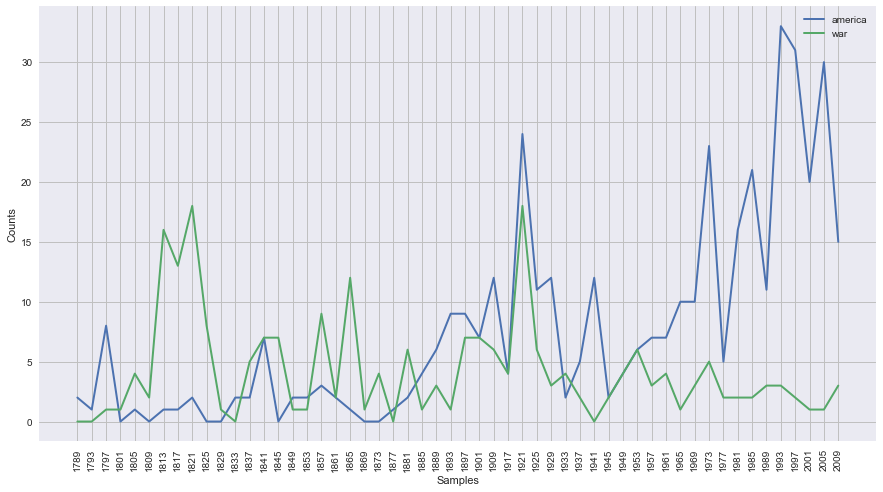

In [8]:
cfd = nltk.ConditionalFreqDist(collection)
fig  = plt.figure(figsize=(15,8))
cfd.plot()


<h4> Which language has the longuest words ? </h4>

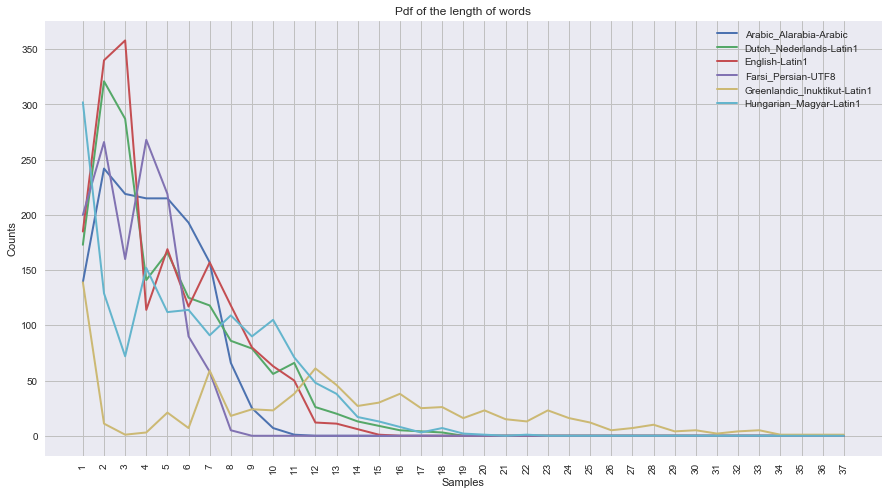

In [9]:
languages = ['Arabic_Alarabia-Arabic', 
             'English-Latin1', 
             'Farsi_Persian-UTF8',
             'Greenlandic_Inuktikut-Latin1', 
             'Hungarian_Magyar-Latin1', 
             'Dutch_Nederlands-Latin1']
fig , ax = plt.subplots(1,1,figsize=(15,8))
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang))
ax.set_title('Pdf of the length of words')
cfd.plot(cumulative=False)

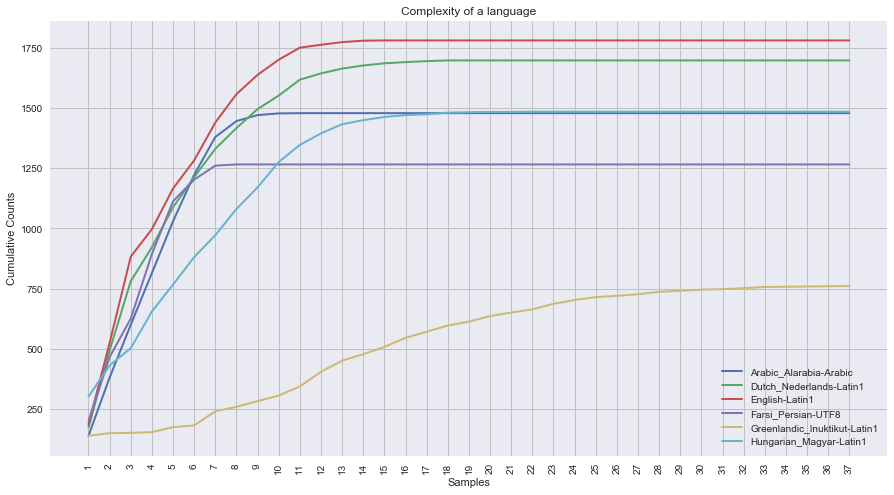

In [10]:
fig , ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title('Complexity of a language')
cfd.plot(cumulative=True)